In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## TASK 1

In [73]:
# Read the dataset
df_data = pd.read_csv('nursery.data', header=None)

# Assuming the last column is the target variable
X = df_data.iloc[:, :-1]
y = df_data.iloc[:, -1]

In [74]:
# Initialize LabelEncoders for each feature column
label_encoders = {col: LabelEncoder() for col in X.columns}

# Apply LabelEncoder to each feature column
for col, le in label_encoders.items():
    X[col] = le.fit_transform(X[col])

# Encode the target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Perform one-hot encoding on the features
X_encoded = pd.get_dummies(X)

C:\Users\anike\AppData\Local\Temp\ipykernel_19604\3345307202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\anike\AppData\Local\Temp\ipykernel_19604\3345307202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\anike\AppData\Local\Temp\ipykernel_19604\3345307202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [76]:
# Train Decision Tree with categorical features
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree (Categorical Features) Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree (Categorical Features) Accuracy: 0.9606481481481481
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       0.93      0.95      0.94       873
           2       0.00      0.00      0.00         2
           3       0.96      0.95      0.95       785
           4       0.80      0.69      0.74        62

    accuracy                           0.96      2592
   macro avg       0.74      0.72      0.73      2592
weighted avg       0.96      0.96      0.96      2592



c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [77]:
# Train Decision Tree with one-hot encoded features
dt_classifier_encoded = DecisionTreeClassifier(random_state=42, max_depth=15)
dt_classifier_encoded.fit(X_train_encoded, y_train_encoded)

# Predict and evaluate
y_pred_dt_encoded = dt_classifier_encoded.predict(X_test_encoded)
print("Decision Tree (One-Hot Encoded Features) Accuracy:", accuracy_score(y_test_encoded, y_pred_dt_encoded))
print(classification_report(y_test_encoded, y_pred_dt_encoded))

Decision Tree (One-Hot Encoded Features) Accuracy: 0.9949845679012346
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       0.99      0.99      0.99       873
           2       0.00      0.00      0.00         2
           3       1.00      0.99      0.99       785
           4       0.93      1.00      0.96        62

    accuracy                           0.99      2592
   macro avg       0.78      0.80      0.79      2592
weighted avg       0.99      0.99      0.99      2592



c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [78]:
# Train Logistic Regression with L1 regularization
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=10)
log_reg.fit(X_train_encoded, y_train_encoded)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_encoded)
print("Logistic Regression (L1 Regularization) Accuracy:", accuracy_score(y_test_encoded, y_pred_log_reg))
print(classification_report(y_test_encoded, y_pred_log_reg))

Logistic Regression (L1 Regularization) Accuracy: 0.7546296296296297
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       0.63      0.67      0.65       873
           2       0.00      0.00      0.00         2
           3       0.64      0.63      0.64       785
           4       0.00      0.00      0.00        62

    accuracy                           0.75      2592
   macro avg       0.45      0.46      0.46      2592
weighted avg       0.74      0.75      0.75      2592



c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [79]:
# Train k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_encoded, y_train_encoded)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_encoded)
print("k-Nearest Neighbors Accuracy:", accuracy_score(y_test_encoded, y_pred_knn))
print(classification_report(y_test_encoded, y_pred_knn))

k-Nearest Neighbors Accuracy: 0.9556327160493827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       0.92      0.96      0.94       873
           2       0.00      0.00      0.00         2
           3       0.95      0.96      0.95       785
           4       0.91      0.32      0.48        62

    accuracy                           0.96      2592
   macro avg       0.76      0.65      0.67      2592
weighted avg       0.95      0.96      0.95      2592



c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## TASK 2

In [3]:
# Define the unipolar sigmoid function
def unipolar_sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the bipolar sigmoid function using the unipolar sigmoid function
def bipolar_sigmoid(x, a = 1):
    return 2 * unipolar_sigmoid(a * x) - 1

# Example usage
x = np.array([-2, -1, 0, 1, 2])
print("Unipolar Sigmoid:", unipolar_sigmoid(x))
print("Bipolar Sigmoid:", bipolar_sigmoid(x))

Unipolar Sigmoid: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Bipolar Sigmoid: [-0.76159416 -0.46211716  0.          0.46211716  0.76159416]


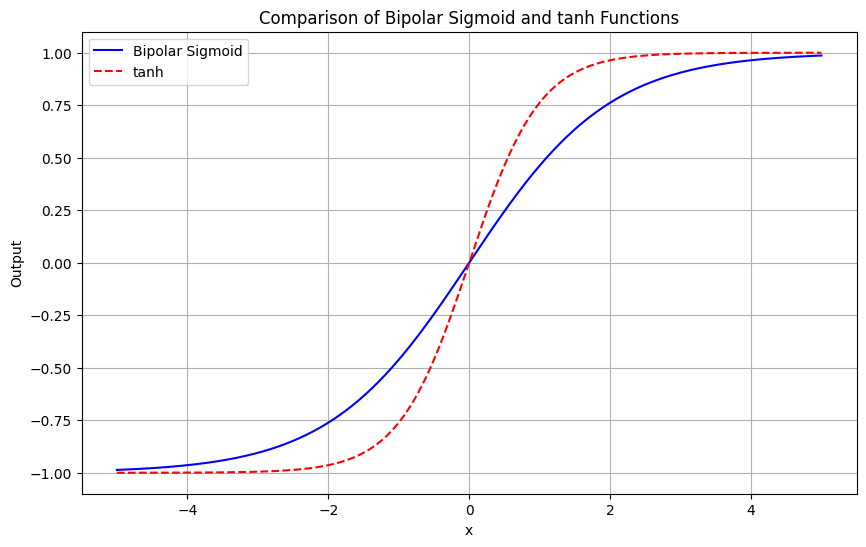

In [7]:
# Define the tanh function
def tanh(x, a = 1):
    return np.tanh(a*x)

# Generate a range of input values
x = np.linspace(-5, 5, 400)

# Compute the responses
y_bipolar_sigmoid = bipolar_sigmoid(x)
y_tanh = tanh(x)

# Plot the responses
plt.figure(figsize=(10, 6))
plt.plot(x, y_bipolar_sigmoid, label='Bipolar Sigmoid', color='blue')
plt.plot(x, y_tanh, label='tanh', color='red', linestyle='--')
plt.title('Comparison of Bipolar Sigmoid and tanh Functions')
plt.xlabel('x')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

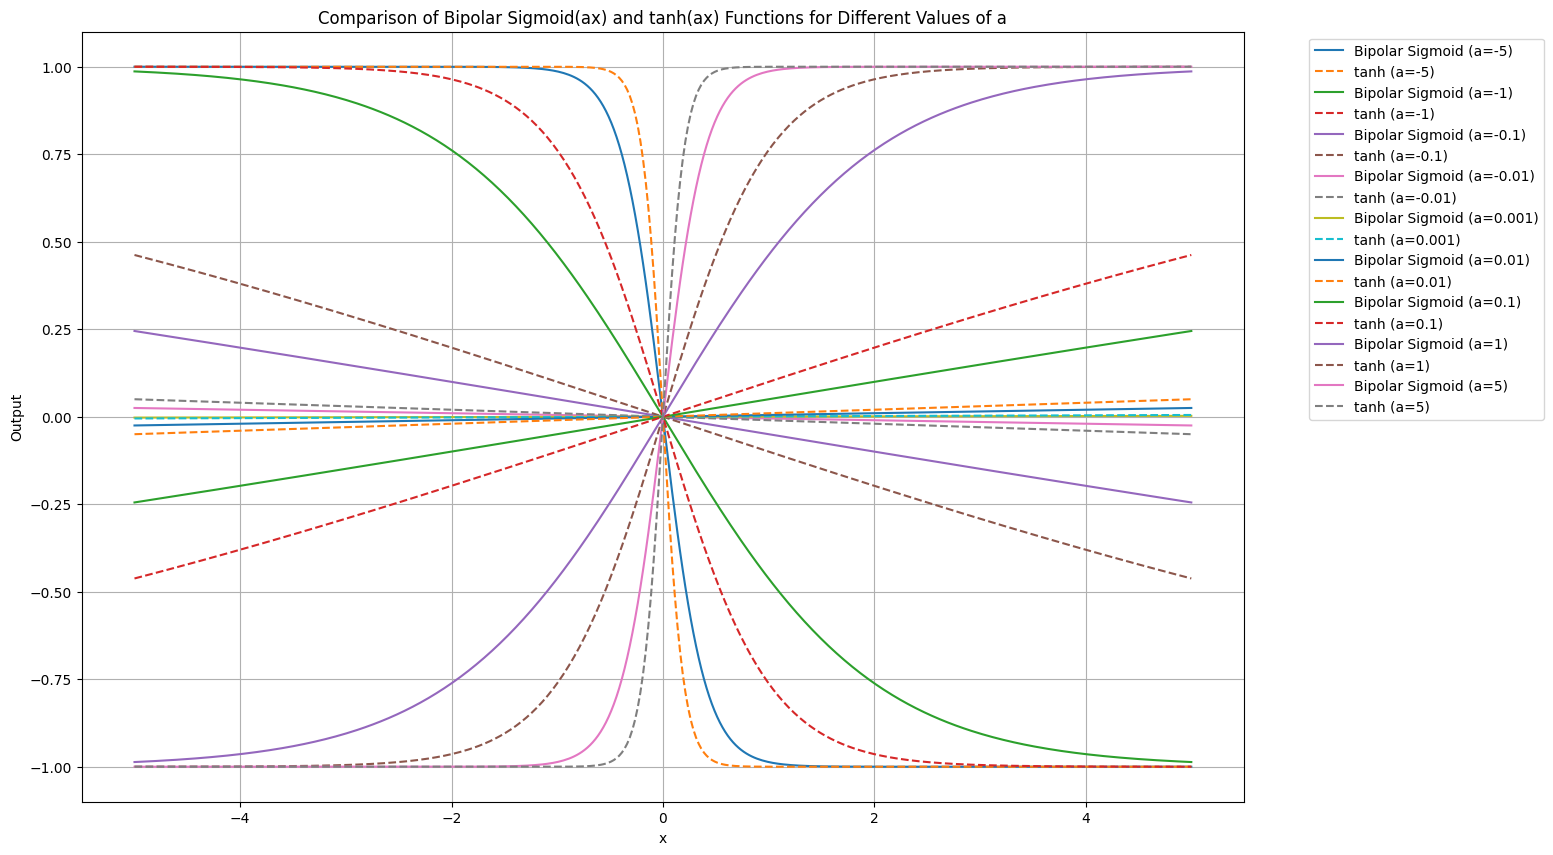

In [9]:
# Generate a range of input values
x = np.linspace(-5, 5, 400)

# Define the values of 'a' to test
a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]

# Plot the responses for different values of 'a'
plt.figure(figsize=(15, 10))

for a in a_values:
    y_bipolar_sigmoid = bipolar_sigmoid(x, a)
    y_tanh = tanh(x, a)
    
    plt.plot(x, y_bipolar_sigmoid, label=f'Bipolar Sigmoid (a={a})', linestyle='-')
    plt.plot(x, y_tanh, label=f'tanh (a={a})', linestyle='--')

plt.title('Comparison of Bipolar Sigmoid(ax) and tanh(ax) Functions for Different Values of a')
plt.xlabel('x')
plt.ylabel('Output')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

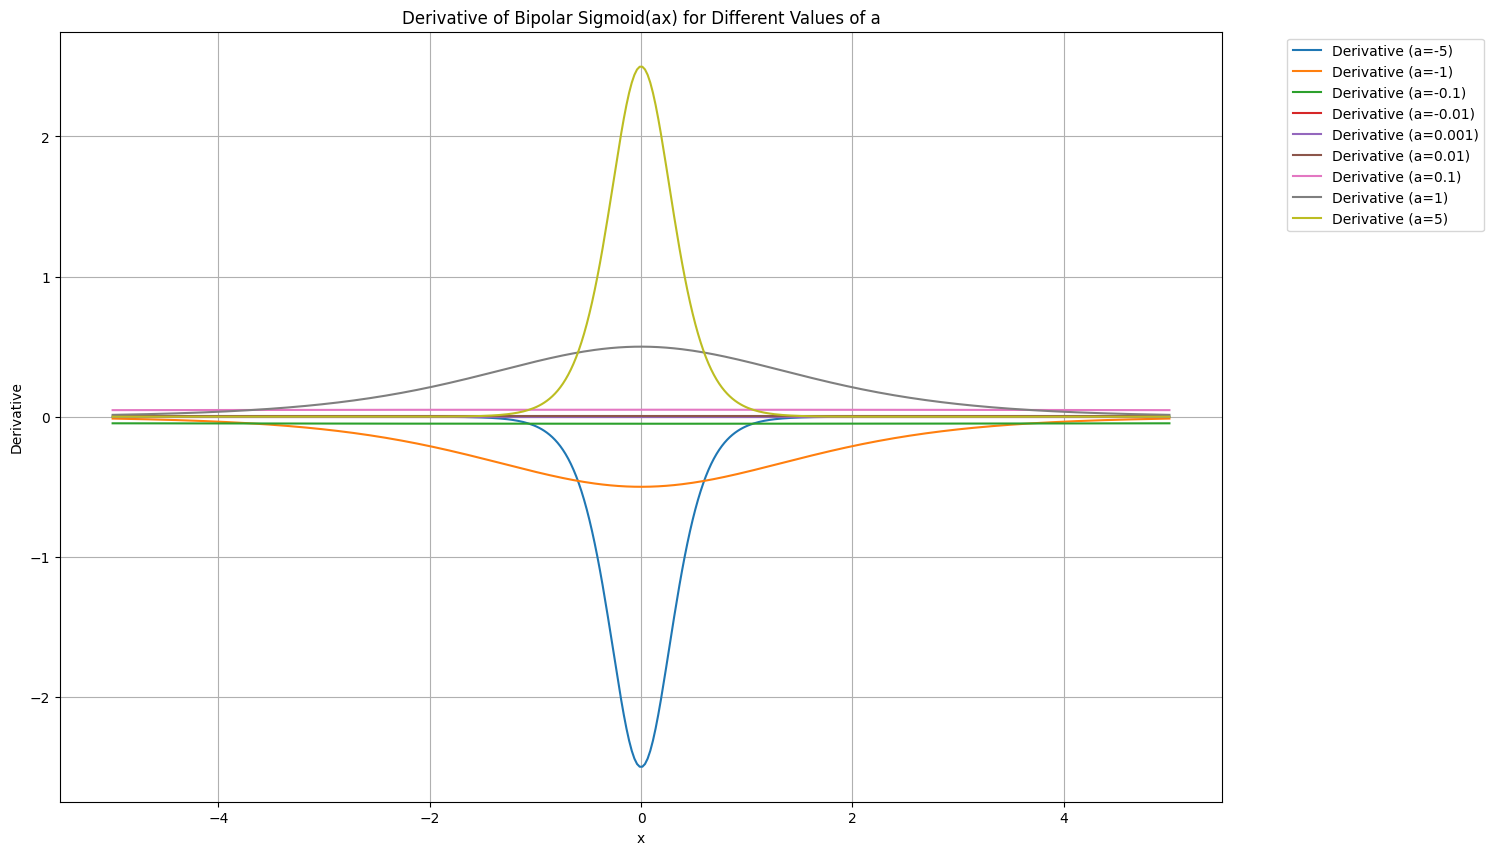

In [83]:
# Define the derivative of the unipolar sigmoid function
def unipolar_sigmoid_derivative(x):
    sigmoid = unipolar_sigmoid(x)
    return sigmoid * (1 - sigmoid)

# Define the derivative of the parameterized bipolar sigmoid function
def bipolar_sigmoid_derivative(x, a):
    return 2 * a * unipolar_sigmoid_derivative(a * x)

# Generate a range of input values
x = np.linspace(-5, 5, 400)

# Define the values of 'a' to test
a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]

# Plot the derivatives for different values of 'a'
plt.figure(figsize=(15, 10))

for a in a_values:
    y_derivative = bipolar_sigmoid_derivative(x, a)
    
    plt.plot(x, y_derivative, label=f'Derivative (a={a})')

plt.title('Derivative of Bipolar Sigmoid(ax) for Different Values of a')
plt.xlabel('x')
plt.ylabel('Derivative')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()